<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_encoding as se


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Carga de datos

In [30]:
# cargamos los datos con los que estamos trabajando
df = pd.read_csv("datos/autorenew_knn_outliers.csv", index_col = 0)
df.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,480.0,test,desconocido,-1.250,manually,0.333333,golf,0.0,NaN,petrol,volkswagen,desconocido
1,private,offer,18300.0,test,coupe,1.000,manually,1.158730,desconocido,-1.0,5.0,diesel,audi,yes
2,private,offer,9800.0,test,suv,0.125,automatic,0.746032,grand,-1.0,8.0,diesel,jeep,desconocido
3,private,offer,1500.0,test,small car,-0.250,manually,-0.634921,golf,0.0,6.0,petrol,volkswagen,no
4,private,offer,3600.0,test,small car,0.625,manually,-0.730159,fabia,-2.4,7.0,diesel,skoda,no


In [31]:
df.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerCV', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

Pandas carga de nuevo el csv infiriendo el tipo de dato, por lo que `monthOfRegistration` lo tenemos que convertir de nuevo a object. Además, vamos a rellenar los nulos con `desconocido`.

In [32]:
df['monthOfRegistration'] = df['monthOfRegistration'].astype(object)

In [33]:
df['monthOfRegistration'].fillna(0, inplace=True)

In [34]:
# Lista de columnas categóricas
lista_col_cat = df.select_dtypes(include = "O").columns.tolist()
lista_col_cat

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

Vamos a seleccionar solamente las variables que son relevantes para llevar a cabo una predicción del precio (podemos comprobar las posibilidades de categorías haciendo `df[columna].nunique()`):

`seller`: Sí es una categoría con 2 valores posibles cuyo efecto en el precio puede ser clave.

`offerType`: Sí es una categoría con 2 valores posibles cuyo efecto en el precio puede ser clave.

`abtest`: Sí es una categoría con 2 valores posibles cuyo efecto en el precio puede ser clave.

`vehicleType`: Sí es una categoría con 7 valores posibles cuyo efecto en el precio puede ser clave.

`gearbox`: Sí es una categoría con 2 valores posibles cuyo efecto en el precio puede ser clave.

`model`: Sí es una categoría, aunque en este caso tenemos 251 valores posibles, que realmente son subcategorías dentro de las marcas por lo que no lo tomaremos.

`monthOfRegistration`: Sí es una categoría con 12 valores posibles cuyo efecto en el precio puede ser clave.

`fuelType`: Sí es una categoría con 7 valores posibles cuyo efecto en el precio puede ser clave.

`brand`: En este caso tenemos 40 opciones disponibles. Claramente la marca de un vehículo puede afectar a su precio así que la tomamos como categoría.

`notRepairedDamage`: Sí es una categoría con 2 valores posibles cuyo efecto en el precio puede ser clave.

In [35]:
# Seleccionamos las columnas adecuadas para el encoding (dejamos a un lado el modelo al ser más bien una subcategoría)
df.drop(columns=['model'], inplace=True)

In [36]:
lista_col_cat = df.select_dtypes(include = "O").columns.tolist()
lista_col_cat

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'fuelType',
 'brand',
 'notRepairedDamage']

---

Comenzamos el análisis para llevar a cabo el encoding

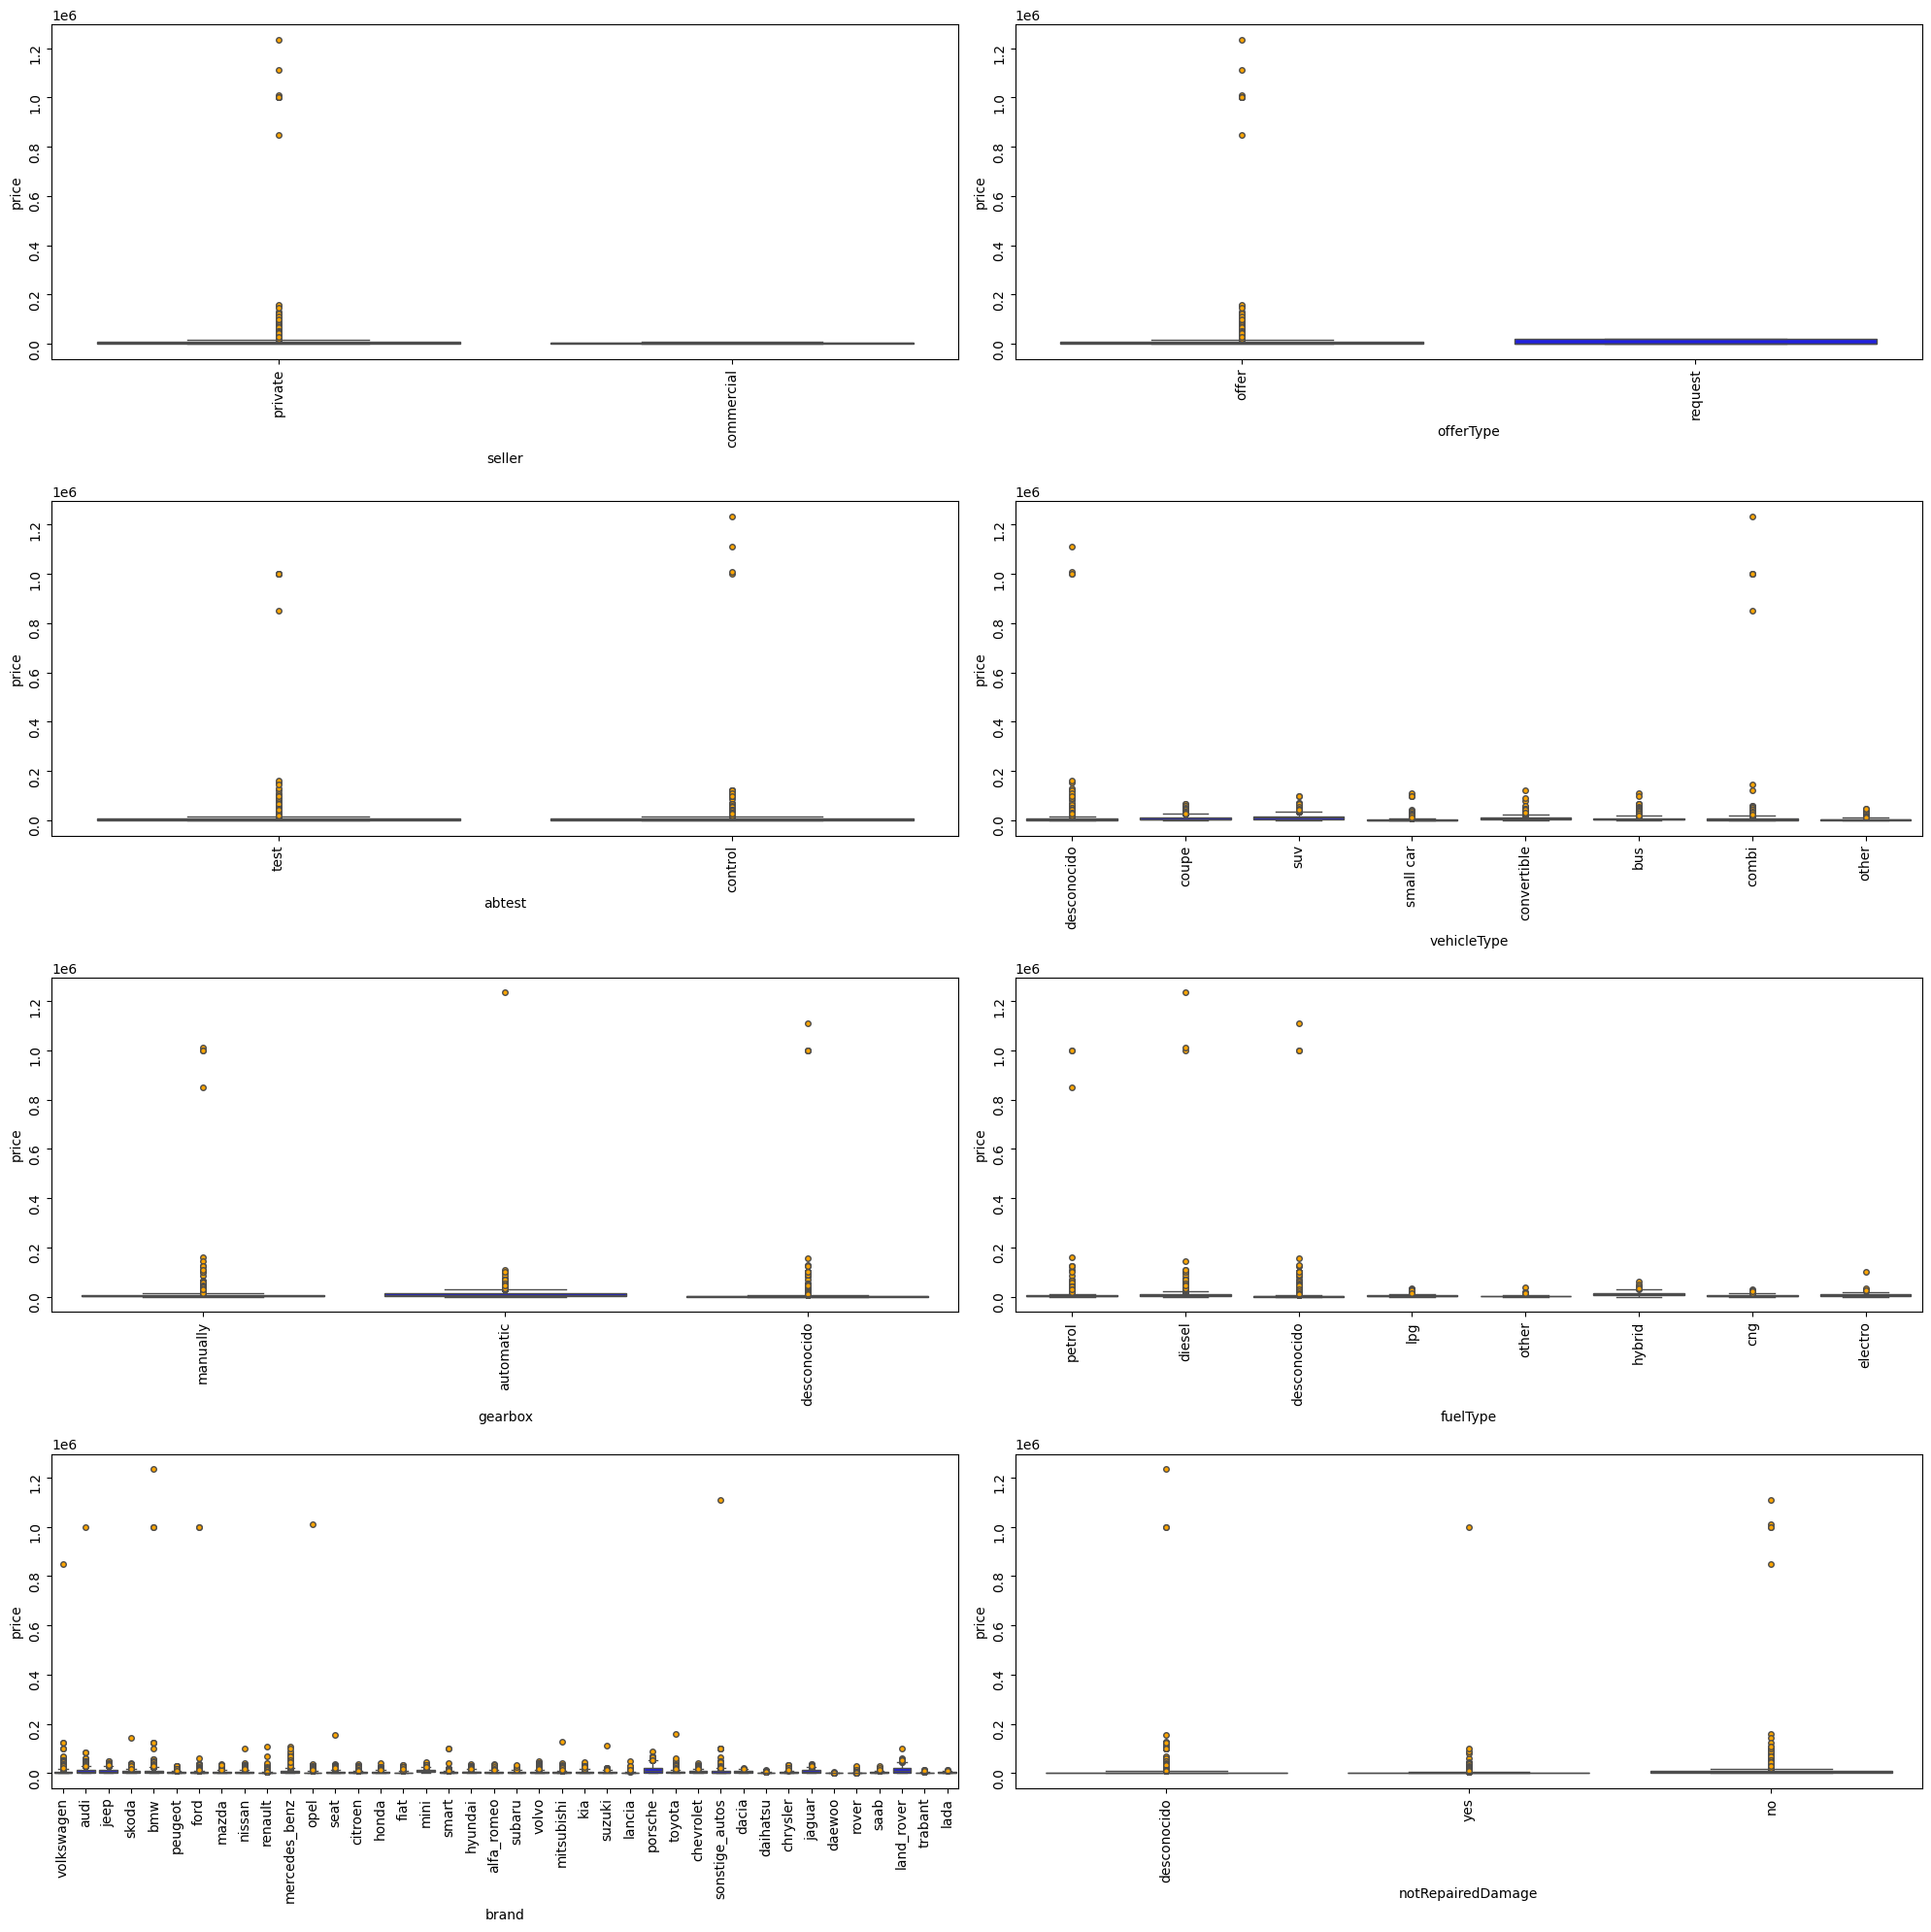

In [37]:
# instanciamos la clase de Encoding
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta = "price", dataframe = df, lista_variables_categorias = lista_col_cat)

# llamamos al método para hacer las gráficas
analisis_encoding.crear_boxplot(tamano_grafica=(20, 20))

Difícil sacar conclusiones. Veámoslo mejor en barplot

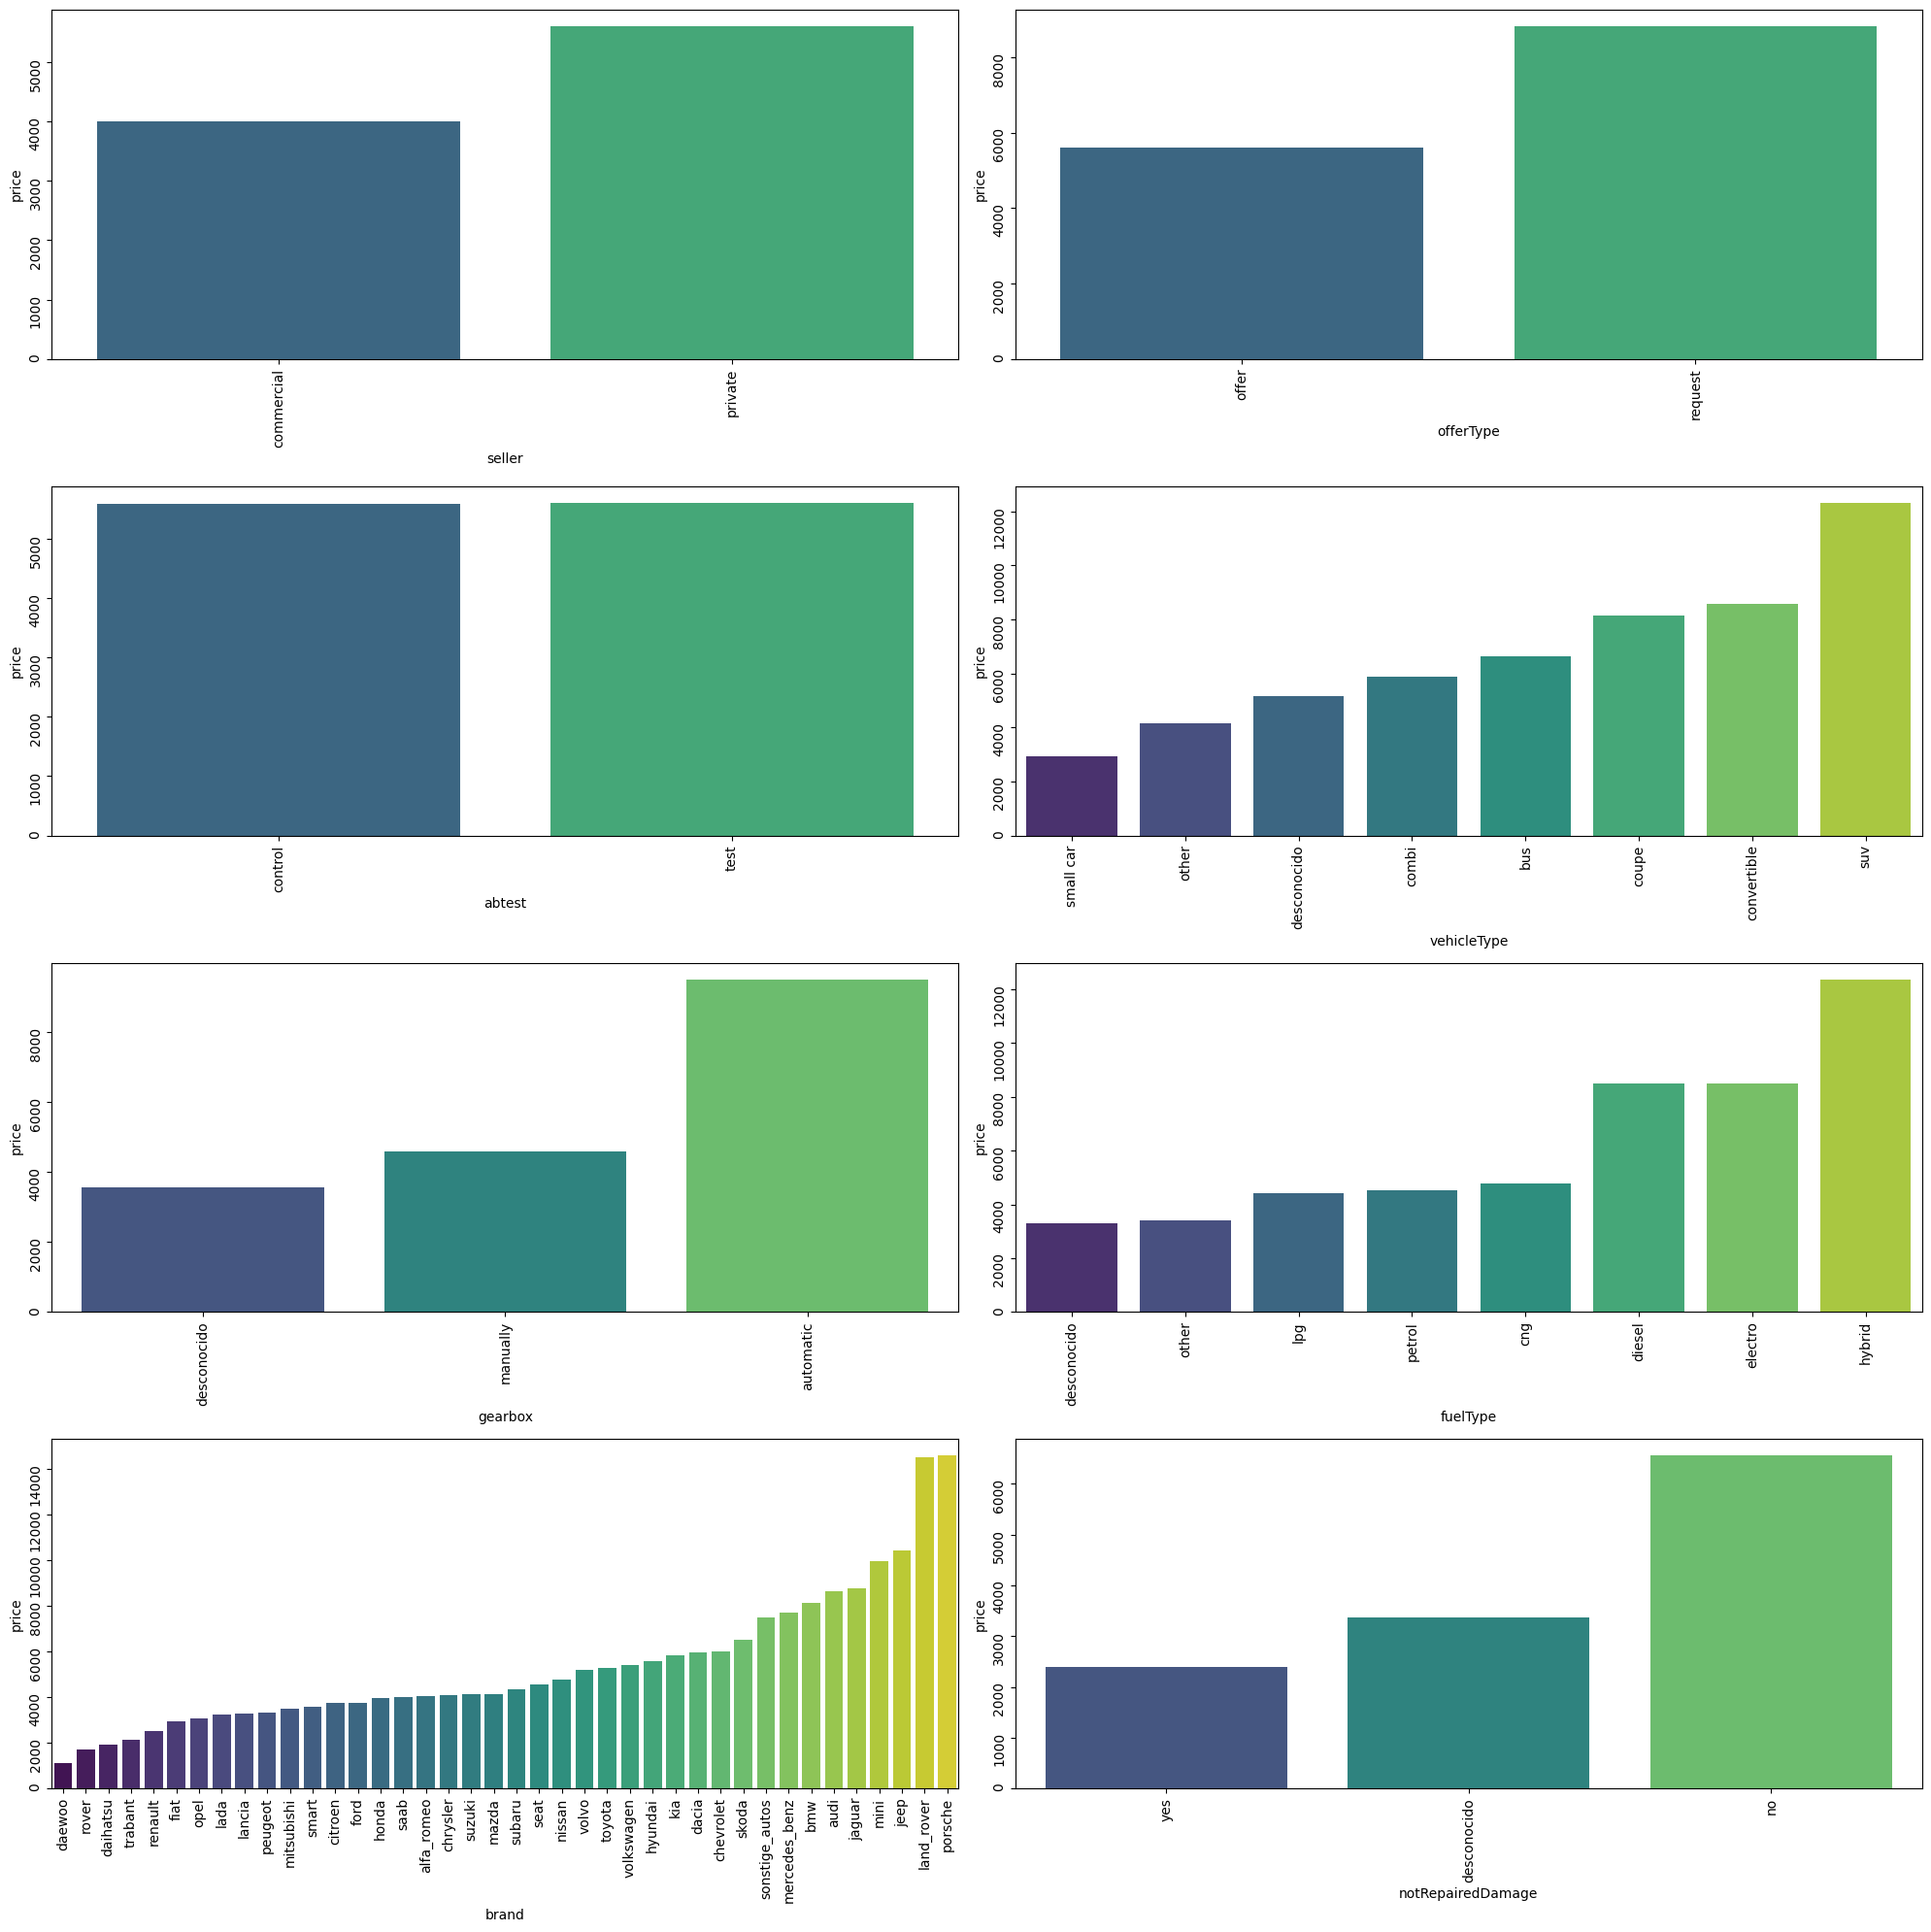

In [38]:
analisis_encoding.crear_barplot(tamano_grafica=(20, 20))

Vemos que todas las variables categóricas (salvo `ABtest`) tienen influencia sobre el precio, de forma que puede haber un orden entre estas variables. En el caso de los meses sí parece haber menos efecto aunque ya tienen un orden implícito.

Vamos a analizarlo llevando a cabo ABtesting, para comprobar si hay diferencias estadísticamente significativas

Convertimos los kilometros a objeto ya que, por cómo está representada esta información, se trata de una variable categórica (ordinal)

In [39]:
df["kilometer"] = df["kilometer"].astype("O")

In [40]:
df['kilometer'].unique()

array([0.0, -1.0, -2.4, -4.8, -3.2, -2.0, -3.6, -5.8, -5.2, -2.8, -4.0,
       -4.4, -5.6], dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334454 entries, 0 to 352486
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               334454 non-null  object 
 1   offerType            334454 non-null  object 
 2   price                334454 non-null  float64
 3   abtest               334454 non-null  object 
 4   vehicleType          334454 non-null  object 
 5   yearOfRegistration   334454 non-null  float64
 6   gearbox              334454 non-null  object 
 7   powerCV              334454 non-null  float64
 8   kilometer            334454 non-null  object 
 9   monthOfRegistration  334454 non-null  float64
 10  fuelType             334454 non-null  object 
 11  brand                334454 non-null  object 
 12  notRepairedDamage    334454 non-null  object 
dtypes: float64(4), object(9)
memory usage: 35.7+ MB


In [42]:
"""# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")

for categoria in lista_col_cat:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")"""

'# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico\nasunciones = se.Asunciones(dataframe = df, columna_numerica = "price")\nprint("\n-------------\n")\n\nfor categoria in lista_col_cat:   \n\n    print(f"Estamos analizando la variable {categoria.upper()}")\n    \n    # comprobamos la asunción de normalidad\n    asunciones.identificar_normalidad(metodo = "kolmogorov") \n\n    # comprobamos la homogeneidad de varianzas\n    asunciones.identificar_homogeneidad(columna_categorica = categoria)\n\n    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas\n    test = se.TestEstadisticos(df, "price", categoria)\n    test.run_all_tests()\n    print("\n###########################\n")'

Las columnas `seller`, `offerType` y `abtest` no tienen orden (no hay evidencia estadística suficiente para rechazar la hipótesis de que sus valores son significativamente diferentes)), pero el resto sí.

Sin embargo...

* `seller`

In [43]:
df["seller"].value_counts()

seller
private       334452
commercial         2
Name: count, dtype: int64

Como solo hay 2 valores de `commercial` y el resto son de `private`, podemos eliminar esta columna ya que estos datos no son representativos (suponemos todo `private`)

In [44]:
df.drop(columns="seller",inplace=True)

* `offerType`

In [45]:
df["offerType"].value_counts()

offerType
offer      334449
request         5
Name: count, dtype: int64

Vaya, pasa algo parecido. Nos quitamos también otra columna de en medio (suponemos todo `offer`)

In [46]:
df.drop(columns="offerType",inplace=True)

* `abtest`

In [47]:
df["abtest"].value_counts()

abtest
test       173037
control    161417
Name: count, dtype: int64

En este caso prácticamente la mitad de los datos son de `control`y la otra mitad de `test` (tiene sentido que sea así)

* `vehicleType`

In [48]:
df["vehicleType"].value_counts()

vehicleType
desconocido    117795
small car       70997
combi           61715
bus             28315
convertible     21480
coupe           17507
suv             13664
other            2981
Name: count, dtype: int64

Aquí también tenemos información valiosa. Esta columna sí tenía orden (ordinal)

* `gearbox`

In [49]:
df["gearbox"].value_counts()

gearbox
manually       248515
automatic       71455
desconocido     14484
Name: count, dtype: int64

Aquí también es representativa y también tenía orden (ordinal)

* `fuelType`

In [50]:
df["fuelType"].value_counts()

fuelType
petrol         202655
diesel          99259
desconocido     26524
lpg              4977
cng               531
hybrid            265
other             145
electro            98
Name: count, dtype: int64

Aquí también es representativa y también tenía orden (ordinal)

* `brand`

In [51]:
df["brand"].value_counts()

brand
volkswagen        70839
bmw               36656
opel              35124
mercedes_benz     32857
audi              29898
ford              22454
renault           15914
peugeot           10051
fiat               8551
seat               6362
skoda              5248
mazda              5213
smart              4961
citroen            4736
nissan             4543
toyota             4454
hyundai            3403
mini               3175
sonstige_autos     3136
volvo              3025
mitsubishi         2756
honda              2611
kia                2366
alfa_romeo         2129
suzuki             2121
porsche            2078
chevrolet          1728
chrysler           1308
dacia               850
jeep                753
land_rover          735
subaru              699
daihatsu            684
jaguar              583
saab                485
daewoo              480
trabant             435
lancia              426
rover               423
lada                204
Name: count, dtype: int64

Ya lo habíamos antes pero obviamente con marcas sí hay información importante y sí había orden (ordinal)

* `notRepairedDamage`

In [52]:
df['notRepairedDamage'].value_counts()

notRepairedDamage
no             244105
desconocido     59894
yes             30455
Name: count, dtype: int64

Aquí también es representativa y también tenía orden (ordinal)

---

### Encoding


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334454 entries, 0 to 352486
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                334454 non-null  float64
 1   abtest               334454 non-null  object 
 2   vehicleType          334454 non-null  object 
 3   yearOfRegistration   334454 non-null  float64
 4   gearbox              334454 non-null  object 
 5   powerCV              334454 non-null  float64
 6   kilometer            334454 non-null  object 
 7   monthOfRegistration  334454 non-null  float64
 8   fuelType             334454 non-null  object 
 9   brand                334454 non-null  object 
 10  notRepairedDamage    334454 non-null  object 
dtypes: float64(4), object(7)
memory usage: 30.6+ MB


Para la columna `abtest` simplemente haremos un one-hot encoder, ya que no hay orden entre ellas.

Para el resto de columnas usaremos un `TargetEncoder` (Nos saltamos `kilometer` porque realmente ya es numérica)

In [54]:
df.select_dtypes(include='O').columns

Index(['abtest', 'vehicleType', 'gearbox', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [55]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [56]:
onehot = OneHotEncoder()
trans_one_hot = onehot.fit_transform(df[["abtest"]])
df_onehot = pd.DataFrame(trans_one_hot.toarray(), columns=onehot.get_feature_names_out())

In [57]:
df_onehot_encoded = pd.concat([df.reset_index(drop=True), df_onehot.reset_index(drop=True)], axis=1)

In [58]:
target_encoder = TargetEncoder()
df_target = target_encoder.fit_transform(X = df_onehot_encoded[['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']], y = df_onehot_encoded["price"])

In [59]:
df_onehot_encoded[df_target.columns] = df_target

In [60]:
# Eliminamos el abtest
df_final = df_onehot_encoded.drop(columns='abtest')

In [61]:
df_final.to_csv("datos/autorenew_knn_outliers_encoded.csv")

---